# Tree height estimation

We use the `<VIRASS.nDSMmodeler>` class to build a deep-learning based nDSM modeler. The usage is similar to the tree segmentaiton and species classification classes.


### Initialization 
We initialize the `nDSMmodeler` class. The behaviour of the class is controlled by the YAML config file provided as input file to the class.

In [2]:
import VIRASS as ges
nDSM_modeler = ges.nDSM_estimation.nDSMmodeler(config_file = "nDSMmodeler_config.yaml")
nDSM_modeler.print_attributes()


***class <nDSMmodeler> initialized ***


---Printing class attributes:---
X_map = None
y_map = None
meta_data = None
DLmodel = None
patch_radius = 0
working_dir = C:/Users/miche/Dropbox/PhD/Projects/GridEyeS/PWD_2/VIRASS/_data/trees/3D_modeling/\
config = {'config_training': {'architecture': 'unet_attention', 'patch_number': 20000, 'patch_radius': 40, 'model_name': 'Unet_attention_height_modeler_2', 'n_epochs': 200, 'lr': 0.001, 'dropout': False}}




### Training

The model name is specified in the config file. If the model exists, the class will load it from the disk. If not, it will train a new model.


 Loading X_map
Converting to channel_last:
(8, 8910, 6217)-->(8910, 6217, 8)
X_map shape:(8910, 6217, 8)
X_map loaded 


 Loading y_map
Converting to channel_last:
(1, 8910, 6217)-->(8910, 6217, 1)
Ground truth shape:(8910, 6217, 1)
y_map loaded 

--Model loaded


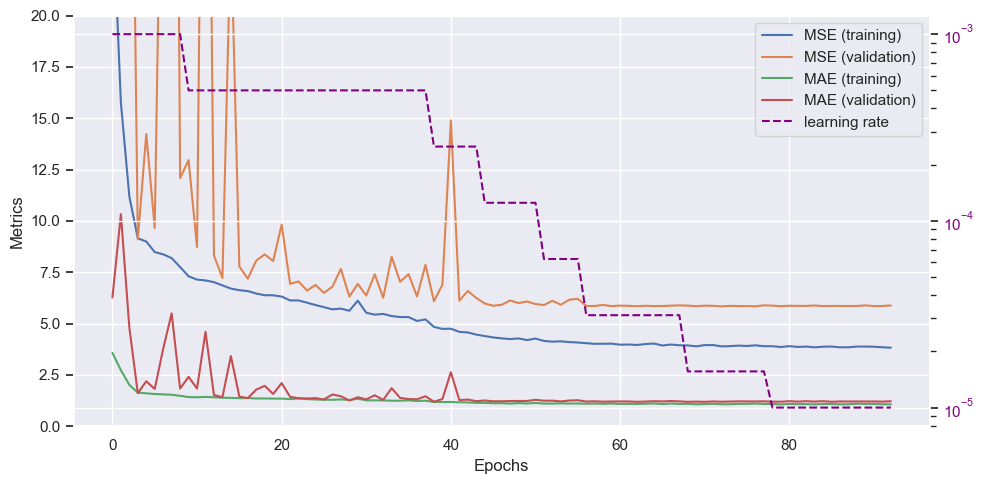

In [3]:
nDSM_modeler.load_X_map("_data/WorldView_area_training.tif")
nDSM_modeler.load_y_map("_data/trees/3D_modeling/GT/GT_nDSM_training.tif")
nDSM_modeler.build_model()
nDSM_modeler.plot_training_history()

### Prediction

Predict on the testing area (non-overlapping with the training area)

In [4]:
SAT_image, meta_data = ges.io.open_geoTiFF("_data/WorldView_area_testing.tif")
nDSM_map = nDSM_modeler.generate_nDSM(SAT_image)

Converting to channel_last:
(8, 4746, 3971)-->(4746, 3971, 8)
Estimated memory 2.2466619014739995 GB 

Segmenting trees with tiles smoothing function
Number of patches: 11900
372/372 [==============================] - 30s 63ms/step


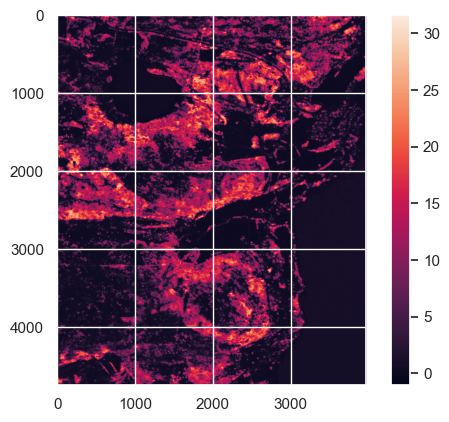

In [6]:
import matplotlib.pyplot as plt
plt.imshow(nDSM_map)
plt.colorbar()

### Evaluation

Evaluate on the testing area

Converting to channel_last:
(1, 4745, 3971)-->(4745, 3971, 1)
Converting to channel_last:
(1, 4746, 3971)-->(4746, 3971, 1)
X_map shape (4745, 3971, 1) 
y_map shape (4746, 3971, 1)
--Resizing to same shape
SAT shape (4745, 3971, 1) 
y_map shape (4745, 3971, 1)

Mean Absolute Error (MAE): 2.03
Root Mean Squared Error (RMSE): 3.39
R-squared (R2): 0.76


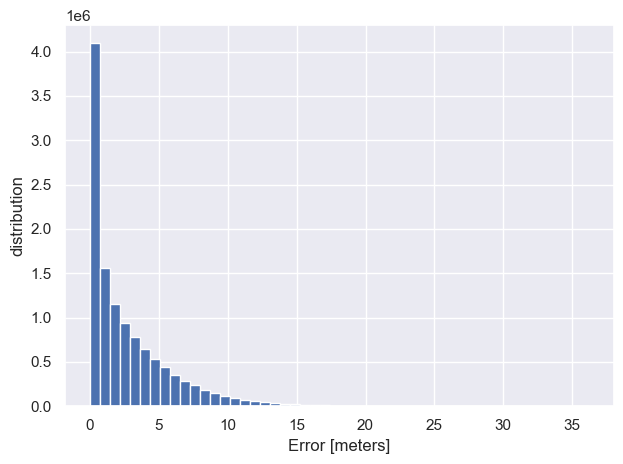

In [7]:
GT_test = ges.io.open_geoTiFF("_data/trees/3D_modeling/GT/GT_nDSM_testing.tif", with_meta_data = False)
nDSM_pred = ges.io.open_geoTiFF("_data/trees/3d_modeling/nDSM_pred_testing.tif", with_meta_data = False) 
ges.nDSM_estimation.compute_performance(GT_test, nDSM_pred)